# PRADA

## Prioritization of Regulatory Pathways based on Analysis of RNA Dynamics Alterations

Dysregulation of RNA stability plays an important role in cancer progression. Key regulators of RNA turnover, such as miRNAs and RNA-binding proteins, have been implicated in a variety of cancers - however, the list of annotated regulatory programs that govern the RNA lifecycle remains incomplete. The development of analytical frameworks for systematic discovery of post-transcriptional regulators is critical for a better understanding of regulatory networks that impact disease progression. For this purpose, we have developed a computational framework, named PRADA, to identify RNA-binding proteins that underlie pathologic gene expression modulations. Using this approach, we uncovered the RNA-binding protein RBMS1 as a novel suppressor of colon cancer progression. Our findings indicate that silencing RBMS1, which is achieved through epigenetic reprogramming, results in increased metastatic capacity in colon cancer cells. Restoring RBMS1 expression, in turn, blunts metastatic capacity. We have shown that RBMS1 functions as a post-transcriptional regulator of RNA stability by binding and stabilizing ~80 target mRNAs. Importantly, our analyses of colon cancer datasets as well as measurements in clinical samples have shown that RBMS1 silencing is associated with disease progression and poor survival. Our findings establish a previously unknown role for RBMS1 in mammalian gene expression regulation and its role in colon cancer metastasis.

### 1. Create and clean up input file (log-fold change)

In this study, we are starting with Illumina arrays from GSE59857, which compares poorly and highly metastatic colon cancer cell lines.

In [1]:
import sys
import os
import pandas as pd
import re
import numpy as np
import scipy as sp
from collections import defaultdict
from itertools import islice
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
expfile = 'input/high-vs-low_metastatic_lines_GSE59857.txt'
exp = pd.read_csv(expfile, sep='\t', header=0, index_col=0)
exp.head()

,RefSeq,CACO2,COLO201,LS123,SW480,SW1417,LS174T,COLO320,HCT116,HT29,WIDR,LOVO
Probe,,,,,,,,,,,,
ILMN_3245919,XM_001714734,151.323411,148.142560,171.410158,167.456323,183.939424,41923.971670,146.239302,177.357721,176.733719,164.927448,158.597969
ILMN_1672148,NM_020299,146.968324,192.024693,123.071839,133.238433,140.839404,2105.803564,124.424634,302.047197,2930.576970,12003.061920,12739.901670
ILMN_1685387,NM_002644,161.659510,143.659146,167.381620,159.185124,129.949763,26836.516690,143.809830,144.222191,153.363798,207.071610,427.244406
ILMN_1720998,NM_001218,205.546207,173.576579,171.661433,126.627450,198.623380,10232.277200,281.566402,318.708726,3647.612966,12367.323190,1912.260020
ILMN_1666536,NM_014312,196.454316,169.608556,225.914542,173.089286,184.556284,387.418966,165.364108,213.687788,7966.161694,20813.031510,207.675049


In [3]:
from scipy.stats import ttest_ind
#Poorly metastatic: CACO2,COLO201,LS123,SW480,SW1417
#Highly metastatic: LS174T,COLO320,HCT116,HT29,WIDR,LOVO
logFC = pd.DataFrame(np.log2(exp.iloc[:,6:12].mean(axis=1) / exp.iloc[:,1:6].mean(axis=1)), columns=['logFC'])
logFC['pval'] = exp.apply(lambda x: ttest_ind(x[1:6], x[6:12], equal_var=False)[1], axis=1)
logFC.head()

,logFC,pval
Probe,,
ILMN_3245919,5.437057,0.363198
ILMN_1672148,5.095663,0.093406
ILMN_1685387,4.932240,0.357067
ILMN_1720998,4.773884,0.083028
ILMN_1666536,4.706519,0.221115


In [4]:
logFC['RefSeq'] = exp['RefSeq']
logFC.head()

,logFC,pval,RefSeq
Probe,,,
ILMN_3245919,5.437057,0.363198,XM_001714734
ILMN_1672148,5.095663,0.093406,NM_020299
ILMN_1685387,4.932240,0.357067,NM_002644
ILMN_1720998,4.773884,0.083028,NM_001218
ILMN_1666536,4.706519,0.221115,NM_014312


In [5]:
logFC_r = logFC.groupby(['RefSeq']).agg(np.mean)
logFC_r.head()

,logFC,pval
RefSeq,,
NM_000014,-0.145564,0.121230
NM_000015,0.766022,0.323496
NM_000016,-0.544629,0.281687
NM_000017,1.211667,0.057775
NM_000018,0.413733,0.294752


In [6]:
logFC_r.to_csv('input/high-vs-low_metastatic_lines_GSE59857_logFC_refseq.txt', sep='\t', index=True, index_label='RefSeq')

In [7]:
exp_r = exp
exp_r.head()

,RefSeq,CACO2,COLO201,LS123,SW480,SW1417,LS174T,COLO320,HCT116,HT29,WIDR,LOVO
Probe,,,,,,,,,,,,
ILMN_3245919,XM_001714734,151.323411,148.142560,171.410158,167.456323,183.939424,41923.971670,146.239302,177.357721,176.733719,164.927448,158.597969
ILMN_1672148,NM_020299,146.968324,192.024693,123.071839,133.238433,140.839404,2105.803564,124.424634,302.047197,2930.576970,12003.061920,12739.901670
ILMN_1685387,NM_002644,161.659510,143.659146,167.381620,159.185124,129.949763,26836.516690,143.809830,144.222191,153.363798,207.071610,427.244406
ILMN_1720998,NM_001218,205.546207,173.576579,171.661433,126.627450,198.623380,10232.277200,281.566402,318.708726,3647.612966,12367.323190,1912.260020
ILMN_1666536,NM_014312,196.454316,169.608556,225.914542,173.089286,184.556284,387.418966,165.364108,213.687788,7966.161694,20813.031510,207.675049


### 2. Generating an RBP-target matrix

In this section, we will create a binary matrix where the rows are transcripts and the columns are RBPs. If the transcript(i) contains a putative binding site for RBP(j), the element(i,j) will be set to '1', otherwise, it will remain '0'.

In [8]:
#RNA Dynamics file: a 3-column tab-delimited file with RefSeq IDs and changes in RNA dynamics (in this case expression)
#and their associated p-values
RDfile = 'input/high-vs-low_metastatic_lines_GSE59857_logFC_refseq.txt'

In [9]:
motifs = pd.read_csv('data/motif_RBP_map.txt', sep='\t', header=0)
motifs.set_index('RBP', inplace=True, drop=False)
motifs.head()

,RBP,motif
RBP,,
MATR3,MATR3,[AC]ATCTT[AG]
ENOX1,ENOX1,[ACT][AG][TG]ACAG
PTBP1,PTBP1,[ACT][TC]TTT[TC]T
RBMS3,RBMS3,[ACT]ATATA
RBM6,RBM6,[ACT]ATCCA[AG]


In [10]:
#write motifs to file
motifs['motif'].unique().tofile('outputs/motifs.txt', sep="\n", format="%s")

In [11]:
#match motifs to fasta file
#needs genregexp
import subprocess
cmd = "gunzip data/hg19_mrna.fa.gz"
print(cmd)
subprocess.call(cmd,shell=True)
cmd = "perl programs/scan_fasta_for_regex_matches.pl outputs/motifs.txt data/hg19_mrna.fa 1 > outputs/motifs-mrna.out"
print(cmd)
subprocess.call(cmd,shell=True)

gunzip data/hg19_mrna.fa.gz
perl programs/scan_fasta_for_regex_matches.pl outputs/motifs.txt data/hg19_mrna.fa 1 > outputs/motifs-mrna.out


0

In [12]:
rmap = defaultdict(dict)
motif=""
refs = {}
with open("outputs/motifs-mrna.out", "rt") as f:
    for l in f:
        if l.startswith('>'):
            l=re.sub('\s+$','',l)
            motif = l[1:]
            continue
        a = l.split('\t')
        rmap[motif][a[0]]=1
        refs[a[0]] = 1


In [13]:
exp = pd.read_csv(RDfile, sep='\t', header=0, index_col=0)
exp.head()

,logFC,pval
RefSeq,,
NM_000014,-0.145564,0.121230
NM_000015,0.766022,0.323496
NM_000016,-0.544629,0.281687
NM_000017,1.211667,0.057775
NM_000018,0.413733,0.294752


In [14]:
mat = pd.DataFrame(0, index=list(set(exp.index) & set(refs.keys())), columns=motifs['RBP'])

In [15]:
for rbp in mat.columns:
    m = motifs.loc[rbp,'motif']
    #print(m)
    #sys.stdout.flush()
    ref = rmap[m].keys()
    ref = list(set(rmap[m].keys()) & set(mat.index))
    mat.loc[ref,rbp] = 1
mat.head()

RBP,MATR3,ENOX1,PTBP1,RBMS3,RBM6,LIN28A,HNRNPC,HNRNPCL1,SNRNP70,RBM8A,...,SRSF2,HNRNPH2,DAZAP1,MSI1,ESRP2,ZC3H14,TIA1,U2AF2,CPEB4,RALY
NM_173362,1,1,1,1,0,1,1,1,1,1,...,1,0,1,1,0,1,1,0,1,1
NM_006196,0,0,1,0,0,0,1,1,1,1,...,1,0,1,0,1,1,1,0,1,1
NM_016579,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
NM_001700,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
NM_001920,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,0,0,1,0


In [16]:
mat.to_csv('outputs/RBP-v-RefSeq_target_matrix.txt', sep='\t', index=True, index_label='RefSeq')

### 3. Generating the proper matrices

The general form of the model:

$\Delta Exp(g)=\sum_{i} \alpha_{i} \cdot t_{i,g} \cdot \Delta Exp(RBP_{i}) + c_{g}$

Contraints:

$min\ \frac{1}{2n} \left [ \left \| \alpha X - Exp \right \|+ \lambda \sum_{i}\frac{\left | \alpha_{i} \right |}{\left | \Delta Exp\left ( RBP_{i} \right )\right |} \right]$

In [17]:
hgnc_to_ref = pd.read_csv('data/hg19_genes_vs_refseq.txt', sep='\t', header=0)
hgnc_to_ref.head()

,HGNC,RefSeq
0,1/2-SBSRNA4,NR_039978
1,A1BG,NM_130786
2,A1BG-AS1,NR_015380
3,A1CF,NM_001198818
4,A1CF,NM_001198819


In [18]:
hgnc_to_ref = hgnc_to_ref.groupby('HGNC')['RefSeq'].apply(lambda x: "%s" % ','.join(x))

In [19]:
mat = pd.read_csv('outputs/RBP-v-RefSeq_target_matrix.txt', sep='\t', header=0, index_col=0)
mat.head()

,MATR3,ENOX1,PTBP1,RBMS3,RBM6,LIN28A,HNRNPC,HNRNPCL1,SNRNP70,RBM8A,...,SRSF2,HNRNPH2,DAZAP1,MSI1,ESRP2,ZC3H14,TIA1,U2AF2,CPEB4,RALY
RefSeq,,,,,,,,,,,,,,,,,,,,,
NM_173362,1,1,1,1,0,1,1,1,1,1,...,1,0,1,1,0,1,1,0,1,1
NM_006196,0,0,1,0,0,0,1,1,1,1,...,1,0,1,0,1,1,1,0,1,1
NM_016579,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
NM_001700,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
NM_001920,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,0,0,1,0


In [20]:
for rbp in mat.columns:
    #print(rbp)
    rbp_refs = hgnc_to_ref[rbp].split(',')
    rbp_sum = 0
    rbp_cnt = 0
    rbp_max = 0
    for r in rbp_refs:
        if r in exp.index:
            if (abs(exp.loc[r,'logFC']) > rbp_max):
                motifs.loc[rbp,'diff'] = exp.loc[r,'logFC']
                motifs.loc[rbp,'pval'] = exp.loc[r,'pval']
                rbp_max = abs(exp.loc[r,'logFC'])

motifs.to_csv('outputs/RBP_motif_diff.txt', sep='\t', index=True, index_label='RefSeq')

In [21]:
for rbp in mat.columns:
    mat[rbp] = mat[rbp]*motifs.loc[rbp,'diff']
mat.head()

,MATR3,ENOX1,PTBP1,RBMS3,RBM6,LIN28A,HNRNPC,HNRNPCL1,SNRNP70,RBM8A,...,SRSF2,HNRNPH2,DAZAP1,MSI1,ESRP2,ZC3H14,TIA1,U2AF2,CPEB4,RALY
RefSeq,,,,,,,,,,,,,,,,,,,,,
NM_173362,-1.129317,0.05266,0.229692,0.079549,-0.000000,-0.055535,0.79533,0.161332,0.462524,-0.017537,...,-0.638921,-0.0,0.368176,0.623895,0.000000,0.120822,-1.240809,0.0,-1.366578,-0.146491
NM_006196,-0.000000,0.00000,0.229692,0.000000,-0.000000,-0.000000,0.79533,0.161332,0.462524,-0.017537,...,-0.638921,-0.0,0.368176,0.000000,0.027613,0.120822,-1.240809,0.0,-1.366578,-0.146491
NM_016579,-0.000000,0.05266,0.000000,0.000000,-0.000000,-0.000000,0.00000,0.000000,0.000000,-0.017537,...,-0.638921,-0.0,0.368176,0.000000,0.027613,0.000000,-0.000000,0.0,-0.000000,-0.000000
NM_001700,-0.000000,0.00000,0.000000,0.000000,-0.000000,-0.000000,0.00000,0.000000,0.462524,-0.000000,...,-0.638921,-0.0,0.000000,0.000000,0.000000,0.000000,-0.000000,0.0,-0.000000,-0.000000
NM_001920,-1.129317,0.05266,0.229692,0.079549,-0.950022,-0.055535,0.79533,0.161332,0.462524,-0.017537,...,-0.638921,-0.0,0.368176,0.623895,0.000000,0.000000,-0.000000,0.0,-1.366578,-0.000000


In [22]:
mat.to_csv('outputs/RBP-v-RefSeq_target_matrix_dExp.txt', sep='\t', index=True, index_label='RefSeq')

In [23]:
#penalties are defined as 1/|dExp|
penalties = pd.DataFrame(index=motifs.index)
penalties['penalties'] = motifs['diff'].apply(lambda x: 1/abs(x))
penalties.to_csv('outputs/penalties.txt', sep='\t', index=True, index_label='RBP')

In [24]:
exp_fil = pd.DataFrame(index=mat.index)
exp_fil['logFC'] = exp.loc[mat.index,'logFC']
exp_fil.to_csv('outputs/high-vs-low_metastatic_lines_GSE59857_logFC_refseq_fil.txt', sep='\t', index=True, index_label='RefSeq')

### 4. Deriving coefficients

Here, we use gneralized linear models (lasso regression with custom penalty terms) to identify RBPs whose expression is informative for predicting the expression of their putative regulon. This custom penalty term ensures that RBPs whose activity does not change are not selected by the model. This also stabilizes the resulting model, which would otherwise be a major issue as RBPs that belong to the same family often have very similar binding preferences resulting in correlated features in the interaction matrix. After running this regression analysis, the RBPs with the largest assigned coefficients (absolute value) are prioritized.

In [25]:
import rpy2
%load_ext rpy2.ipython

In [26]:
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

In [27]:
%%R -o coef,fit,x,y,y.t
library(Matrix)
library(glmnet)
library(tidyverse)
x <- read.table('outputs/RBP-v-RefSeq_target_matrix_dExp.txt', row.names=1, header=TRUE, sep="\t")
y <- read.table('outputs/high-vs-low_metastatic_lines_GSE59857_logFC_refseq_fil.txt', row.names=1, header=TRUE, sep="\t")
p.fac <- read.table('outputs/penalties.txt', row.names=1, header=TRUE, sep="\t")

library(bestNormalize)
(BNobject <- bestNormalize(as.matrix(y), quiet=T))

fit <- glmnet(as.matrix(x), BNobject$x.t, penalty.factor=as.numeric(unlist(p.fac)), family="gaussian", alpha=1)
y.t <- BNobject$x.t

coef <- as.matrix(coef(fit))
colnames(coef) <- apply(abs(fit$beta), 2, sum) #set L1 norm as the header
coef <- coef[,round(as.numeric(colnames(coef)), digits=2)<=0.75]
coef <- coef[rowSums(coef)!=0,]
coef <- coef[order(coef[,dim(coef)[2]], decreasing=T),]
coef <- coef[-1,]
x <- as_tibble(x, rownames="RefSeq")
y <- as_tibble(y, rownames="RefSeq")
fit$dev
write.table(coef, file='outputs/high-vs-low_metastatic_lines_GSE59857_coef.txt',sep="\t", row.names=TRUE, col.names=NA, quote=F)

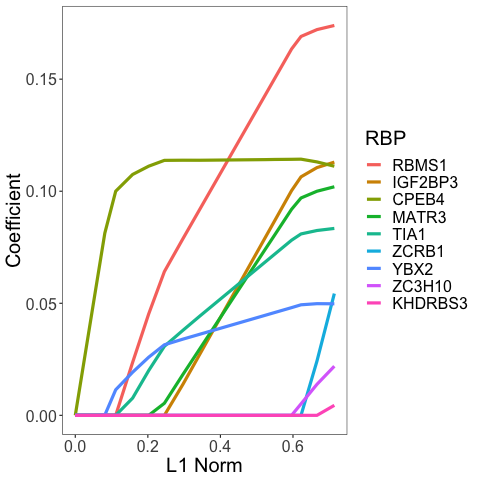

In [28]:
%%R -i coef
library(tidyverse)
library(reshape2)
df <- as_tibble(melt(coef))
colnames(df) <- c('RBP', 'norm', 'coefficient')
df %>% ggplot(aes(x=norm, y=coefficient, group=RBP, color=RBP)) + geom_line(size=1.5) + theme_bw(12) + 
xlab("L1 Norm") + ylab("Coefficient") +
theme(text = element_text(size=20), panel.grid.minor = element_blank(), panel.grid.major = element_blank())
#ggsave("outputs/PRADA_coeffcients_vs_L1norm.pdf", width=4.5, height=3)